# Motivating machine learning with human learning

**Question:** Can *you* predict the species of an iris using petal and sepal measurements?

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

Populating the interactive namespace from numpy and matplotlib


## Read the iris data into a pandas DataFrame, including column names.

In [2]:
# define a list of column names (as strings)
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# define the URL from which to retrieve the data (as a string)
url = '../data/iris.data'

# retrieve the CSV file and add the column names
iris = pd.read_csv(url, header=None, names=col_names)

Gather some basic information about the data.

In [3]:
iris.shape

(150, 5)

In [4]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In [7]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Look for differences between species.

In [8]:
# sort the DataFrame by petal_width and display the NumPy array
print(iris.sort_values(by='petal_width').values)

[[5.2 4.1 1.5 0.1 'Iris-setosa']
 [4.3 3.0 1.1 0.1 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']
 [4.8 3.0 1.4 0.1 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']
 [5.1 3.5 1.4 0.2 'Iris-setosa']
 [5.2 3.5 1.5 0.2 'Iris-setosa']
 [5.2 3.4 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.6 0.2 'Iris-setosa']
 [4.8 3.1 1.6 0.2 'Iris-setosa']
 [5.5 4.2 1.4 0.2 'Iris-setosa']
 [5.5 3.5 1.3 0.2 'Iris-setosa']
 [4.4 3.0 1.3 0.2 'Iris-setosa']
 [5.1 3.4 1.5 0.2 'Iris-setosa']
 [4.4 3.2 1.3 0.2 'Iris-setosa']
 [5.1 3.8 1.6 0.2 'Iris-setosa']
 [4.6 3.2 1.4 0.2 'Iris-setosa']
 [5.3 3.7 1.5 0.2 'Iris-setosa']
 [5.0 3.3 1.4 0.2 'Iris-setosa']
 [5.0 3.0 1.6 0.2 'Iris-setosa']
 [4.8 3.4 1.9 0.2 'Iris-setosa']
 [5.0 3.2 1.2 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [5.0 3.4 1.5 0.2 'Iris-setosa']
 [4.4 2.9 1.4 0.2 'Iris-setosa']
 [5.4 3.7 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']
 [4.8 3.4 1.6 0.2 'Iris-setosa']
 [5.8 4.0 

In [9]:
# mean of sepal_length grouped by species
iris.groupby('species').sepal_length.mean()

species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal_length, dtype: float64

In [10]:
# mean of all numeric columns grouped by species
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


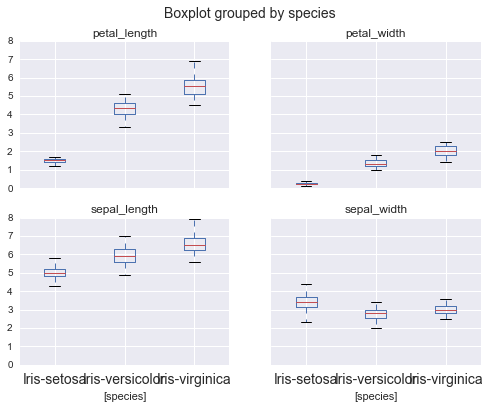

In [11]:
# box plot of all numeric columns grouped by species
iris.boxplot(by='species')
plt.show()

In [12]:
# map species to a numeric value so that plots can be colored by species
iris['species_num'] = iris.species.factorize()[0]

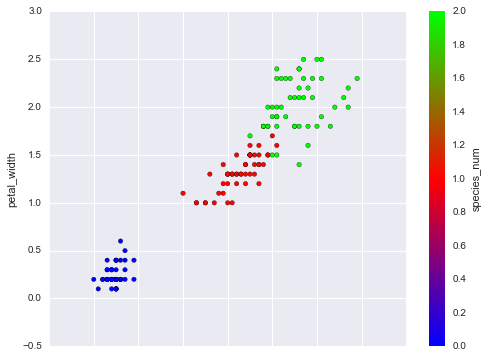

In [13]:
# scatter plot of petal_length vs petal_width colored by species
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg')
plt.show()

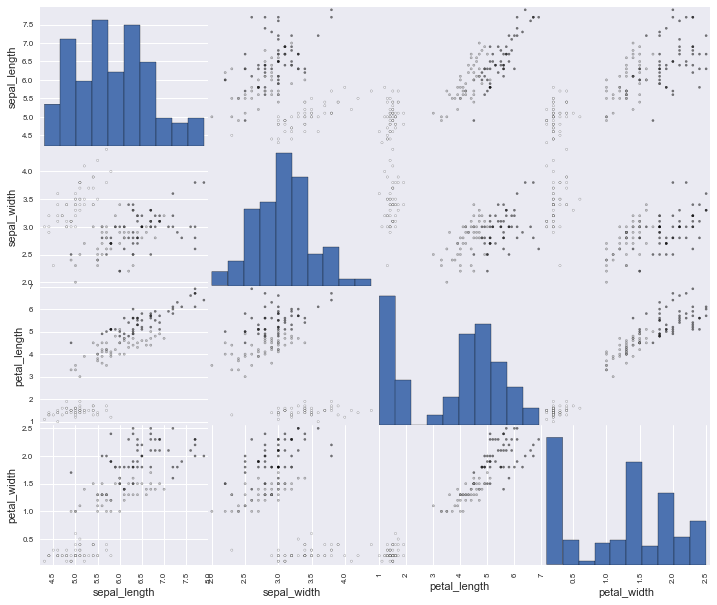

In [14]:
# scatter matrix of all features colored by species
pd.scatter_matrix(iris.drop('species_num', axis=1), c=iris.species_num, figsize=(12, 10))
plt.show()

## Write down a set of rules that could be used to predict species based on iris measurements.

In [15]:
# define a new feature that represents petal area ("feature engineering")
iris['petal_area'] = iris.petal_length * iris.petal_width

In [16]:
# description of petal_area grouped by species
iris.groupby('species').petal_area.describe().unstack()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,0.3628,0.183248,0.11,0.2650,0.300,0.42,0.96
Iris-versicolor,50.0,5.7204,1.368403,3.30,4.8600,5.615,6.75,8.64
Iris-virginica,50.0,11.2962,2.157412,7.50,9.7175,11.445,12.79,15.87


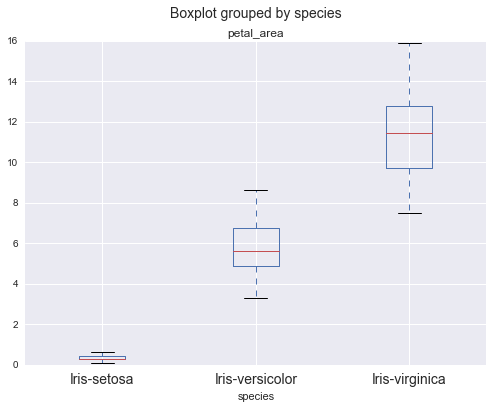

In [17]:
# box plot of petal_area grouped by species
iris.boxplot(column='petal_area', by='species')
plt.show()

In [18]:
# only show irises with a petal_area between 7 and 9
iris[(iris.petal_area > 7) & (iris.petal_area < 9)].sort_values(by='petal_area')

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,petal_area
86,6.7,3.1,4.7,1.5,Iris-versicolor,1,7.05
85,6.0,3.4,4.5,1.6,Iris-versicolor,1,7.20
52,6.9,3.1,4.9,1.5,Iris-versicolor,1,7.35
72,6.3,2.5,4.9,1.5,Iris-versicolor,1,7.35
119,6.0,2.2,5.0,1.5,Iris-virginica,2,7.50
56,6.3,3.3,4.7,1.6,Iris-versicolor,1,7.52
106,4.9,2.5,4.5,1.7,Iris-virginica,2,7.65
133,6.3,2.8,5.1,1.5,Iris-virginica,2,7.65
134,6.1,2.6,5.6,1.4,Iris-virginica,2,7.84
83,6.0,2.7,5.1,1.6,Iris-versicolor,1,8.16


My set of rules for predicting species:

- If petal_area is less than 2, predict **setosa**.
- Else if petal_area is less than 7.4, predict **versicolor**.
- Otherwise, predict **virginica**.

In [19]:
# given a row of data, return a predicted species_num (0/1/2)
def classify_iris(row):

    # calculate the petal_area
    petal_area = row[2] * row[3]
    
    # predict the species based on the rules above    
    if petal_area < 2:
        prediction = 'setosa'
    elif petal_area < 7.4:
        prediction = 'versicolor'
    else:
        prediction = 'virginica'
    
    # map the species name to a numeric value
    species_to_num = {'setosa':0, 'versicolor':1, 'virginica':2}
    
    # return that value
    return species_to_num[prediction]

In [20]:
# make predictions for all rows and store them in the DataFrame
iris['prediction'] = [classify_iris(row) for index, row in iris.iterrows()]

In [21]:
# calculate the percentage of correct predictions
sum(iris.species_num == iris.prediction) / 150.

0.97333333333333338